# 이 노트북은...
RI, CHL, label polygon이 그려진 이미지 세 파일의 경로와 해당 일시 센서 데이터를 병합한 csv 파일을 만들어 저장합니다. (img_load_test.ipynb 에서 분리되었습니다.)

# 이미지에 라벨 폴리곤 넣기

In [1]:
import os
path = 'image_data/RI'
data_files = os.listdir(path)

print(len([x for x in data_files if x.split('.')[-1]=='jpg']))

390


In [2]:
jsons = [x for x in data_files if x.split('.')[-1]=='json']
print(len(jsons),len(data_files))

269 659


## 이미지 하나 라벨 넣어보기

In [3]:
import json
fp = open(os.path.join(path, jsons[1]), "r")
a=json.load(fp)
#a

In [4]:
points = a['shapes'][2]['points']
print(len(a['shapes']),points)

10 [[310.930576070901, 753.0162481536189], [303.8404726735598, 758.4815361890694], [302.8064992614475, 765.8670605612998], [309.1580502215657, 778.4224519940916], [317.13441654357456, 782.5583456425406], [319.3500738552437, 787.1373707533235], [318.4638109305761, 797.6248153618907], [320.384047267356, 814.9069423929099], [324.0768094534712, 823.1787296898079], [324.0768094534712, 830.2688330871492], [327.6218611521418, 832.6322008862629], [329.9852289512555, 844.7444608567208], [336.1890694239291, 846.5169867060562], [334.4165435745938, 829.6779911373708], [335.89364844903986, 819.781388478582], [342.39290989660265, 808.7031019202363], [344.7562776957164, 802.2038404726735], [347.2673559822747, 792.7503692762186], [342.8360413589365, 788.7621861152141], [332.4963072378139, 788.1713441654357], [343.27917282127027, 782.410635155096], [340.47267355982274, 773.1048744460857], [333.97341211225995, 776.354505169867], [328.65583456425406, 772.9571639586411], [325.25849335302803, 769.116691285

In [5]:
a['imageWidth'], type(a['imageWidth'])

(1216, int)

In [6]:
a['imageHeight']

1192

In [7]:
import numpy as np
import cv2

cv2.polylines()에서 네 번째 parameter가 polyline의 색이 됩니다.

In [8]:
blue_color = (0,0,255)
red_color = (255,0,0)
gb_color = (0,255,255)
img = np.zeros((a['imageHeight'], a['imageWidth'], 3), np.uint8)

for points in a['shapes']:
    img1 = np.zeros((a['imageHeight'], a['imageWidth'], 3), np.uint8)
    pts = np.array(points['points'], np.int32)
    pts = pts.reshape((-1, 1, 2))
    img1 = cv2.polylines(img1, [pts], True, gb_color, 3)
    img = cv2.add(img, img1)


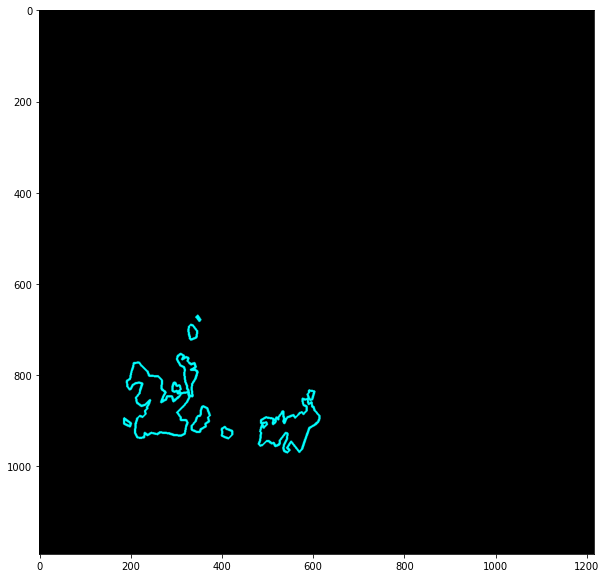

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(img)

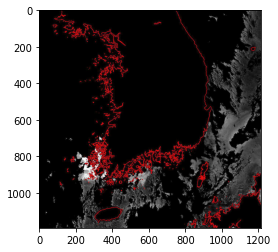

In [10]:
orig_img = plt.imread(os.path.join(path, a['imagePath']))
plt.imshow(orig_img)

In [11]:
print(orig_img.shape, img.shape)

(1192, 1216, 3) (1192, 1216, 3)


# 이미지 병합: 두 가지 방법
cv2.add 를 쓰는 것이 낫겠다.

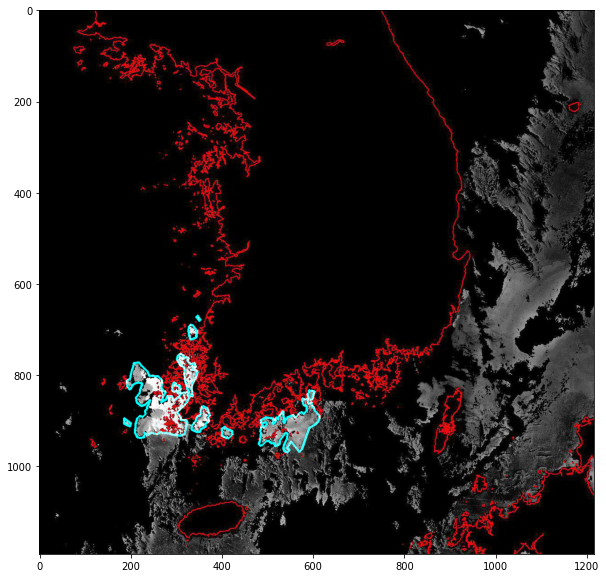

In [12]:
merged_img = cv2.add(orig_img, img)
plt.figure(figsize=(10,10))
plt.imshow(merged_img)

invert color

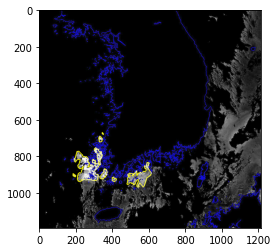

In [13]:
merged_img = cv2.cvtColor(merged_img, cv2.COLOR_BGR2RGB)
plt.imshow(merged_img)

## 데이터는 어떻게 저장할까?
크게 두 가지 방법을 생각할 수 있겠지만 다음과 같이 한다.  
- 병합된 이미지 따로 저장해두기 : 저장공간을 낭비하는 셈인데 그렇게 부담이 되진 않는다.  

## list_attr.csv 의 수정 방법  
list_attr.csv 파일은 [이 노트북](https://github.com/chhyyi/aiffelthon/blob/main/cvae_poc/cvae_poc.ipynb)으로 만들었던 것인데 비슷한 방식으로 fp_and_cond_input.csv 파일을 만들어 저장한다. label된 이미지도 저장하고, 그 경로도 포함한다.

__path_RI, path_CHL 경로 지정__

In [14]:
path_RI = 'image_data/RI'
path_CHL = 'image_data/CHL'

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

sample_chls=os.listdir(path_CHL)
sample_chls=[os.path.join(path_CHL, i) for i in sample_chls]
sample_ris=os.listdir(path_RI)
jsons=[os.path.join(path_RI, i) for i in sample_ris if i.split('.')[-1]=='json']
sample_ris=[os.path.join(path_RI, i) for i in sample_ris if i.split('.')[-1]=='jpg']

#print(sample_chls)
print(len(sample_chls), len(sample_ris))


386 390


In [16]:
import pandas as pd
sample_chls_fn_split=[list(i.split('/')[-1].split('.')[0].split('_'))+[i] for i in sample_chls]
sample_ris_fn_split=[list(i.split('/')[-1].split('.')[0].split('_'))+[i] for i in sample_ris]
jsons_fn_split=[list(i.split('/')[-1].split('.')[0].split('_'))+[i] for i in jsons]

In [17]:
print(jsons_fn_split[0], sample_chls_fn_split[0], sample_ris_fn_split[0])

['20190825', '14', 'RI', 'image_data/RI/20190825_14_RI.JPG.jpg.json'] ['20200914', '12', 'CHL', 'image_data/CHL/20200914_12_CHL.JPG.jpg'] ['20200918', '12', 'RI', 'image_data/RI/20200918_12_RI.JPG.jpg.jpg']


In [18]:
sample_chls_df=pd.DataFrame(sample_chls_fn_split, columns=['date', 'hour', 'product','file'])
sample_ris_df=pd.DataFrame(sample_ris_fn_split, columns=['date', 'hour', 'product','file'])
jsons_df=pd.DataFrame(jsons_fn_split, columns=['date', 'hour', 'product','file'])

sample_ris_df.dropna(inplace=True)
#sample_ris_df['file']=sample_ris_df['file'].apply(lambda x:os.path.join(path_RI,x))
sample_chls_df.dropna(inplace=True)
#sample_chls_df['file']=sample_chls_df['file'].apply(lambda x:os.path.join(path_CHL,x))
jsons_df.dropna(inplace=True)
#jsons_df['file']=jsons_df['file'].apply(lambda x:os.path.join(path_RI,x))

sample_chls_df.sort_values(by=['date', 'hour'], inplace=True)
sample_ris_df.sort_values(by=['date', 'hour'], inplace=True)
jsons_df.sort_values(by=['date', 'hour'], inplace=True)

sample_ris_df['year']=sample_ris_df['date'].astype('datetime64[D]').apply(lambda x:x.year)
sample_ris_df['mm']=sample_ris_df['date'].astype('datetime64[D]').apply(lambda x:x.month)
sample_ris_df['dd']=sample_ris_df['date'].astype('datetime64[D]').apply(lambda x:x.day)
sample_ris_df['hh']=sample_ris_df['hour'].astype('int')
sample_ris_df.drop(columns=['date', 'hour'], inplace=True)
sample_ris_df.reset_index(drop=True, inplace=True)

sample_chls_df['year']=sample_chls_df['date'].astype('datetime64[D]').apply(lambda x:x.year)
sample_chls_df['mm']=sample_chls_df['date'].astype('datetime64[D]').apply(lambda x:x.month)
sample_chls_df['dd']=sample_chls_df['date'].astype('datetime64[D]').apply(lambda x:x.day)
sample_chls_df['hh']=sample_chls_df['hour'].astype('int')
sample_chls_df.drop(columns=['date', 'hour'], inplace=True)
sample_chls_df.reset_index(drop=True, inplace=True)


jsons_df['year']=jsons_df['date'].astype('datetime64[D]').apply(lambda x:x.year)
jsons_df['mm']=jsons_df['date'].astype('datetime64[D]').apply(lambda x:x.month)
jsons_df['dd']=jsons_df['date'].astype('datetime64[D]').apply(lambda x:x.day)
jsons_df['hh']=jsons_df['hour'].astype('int')
jsons_df.drop(columns=['date', 'hour'], inplace=True)
jsons_df.reset_index(drop=True, inplace=True)

실측 라벨/조건 라벨

In [19]:
sensory='observe_train_refined_with_datetime.csv'
#sensory='codition_train_refined_with_datetime.csv'
sensory=pd.read_csv(sensory, index_col = 0)
sensory.drop(columns='interpolated', inplace=True)

In [20]:
sensory.iloc[:,:-5]=(sensory.iloc[:,:-5]-sensory.iloc[:,:-5].min())/(sensory.iloc[:,:-5].max()-sensory.iloc[:,:-5].min()) #distributed 0~1
sensory

,풍속(m/s),풍향(deg),기온(°C),수온(°C),강수량(mm),풍속(m/s).1,풍향(deg).1,기온(°C).1,수온(°C).1,강수량(mm).1,...,풍속(m/s).4,풍향(deg).4,기온(°C).4,수온(°C).4,강수량(mm).4,적조발생,year,mm,dd,hh
39,0.136364,0.838889,0.458549,0.383562,0.0,0.047297,0.741667,0.492308,0.243386,0.0,...,0.078603,0.986111,0.748936,0.368421,0.0,0.0,2017,1,2,16
40,0.210744,0.825000,0.468912,0.388128,0.0,0.033784,0.711111,0.505128,0.253968,0.0,...,0.213974,0.013889,0.746099,0.364372,0.0,0.0,2017,1,2,17
41,0.194215,0.852778,0.479275,0.383562,0.0,0.057432,0.675000,0.500000,0.248677,0.0,...,0.248908,0.927778,0.747518,0.364372,0.0,0.0,2017,1,2,18
42,0.206612,0.813889,0.489637,0.360731,0.0,0.047297,0.711111,0.512821,0.243386,0.0,...,0.192140,0.930556,0.753191,0.364372,0.0,0.0,2017,1,2,19
43,0.276860,0.891667,0.484456,0.347032,0.0,0.226351,0.769444,0.530769,0.238095,0.0,...,0.288210,0.016667,0.751773,0.368421,0.0,0.0,2017,1,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50370,0.016529,0.580556,0.707254,0.707763,0.0,0.097973,0.386111,0.776923,0.693122,0.0,...,0.052402,0.016667,0.878014,0.732794,0.0,0.0,2022,9,30,19
50371,0.066116,0.602778,0.709845,0.698630,0.0,0.108108,0.400000,0.769231,0.687831,0.0,...,0.074236,0.052778,0.843972,0.696356,0.0,0.0,2022,9,30,20
50372,0.066116,0.691667,0.707254,0.698630,0.0,0.091216,0.400000,0.769231,0.682540,0.0,...,0.048035,0.961111,0.822695,0.684211,0.0,0.0,2022,9,30,21
50373,0.082645,0.730556,0.699482,0.716895,0.0,0.060811,0.497222,0.761538,0.682540,0.0,...,0.048035,0.922222,0.858156,0.676113,0.0,0.0,2022,9,30,22


## 실제 DF 통합
pandas dataframe의 merge를 이용해 하나로 취합한다.

In [21]:
jsons_df=jsons_df.drop(columns='product')
sample_ris_df = sample_ris_df.drop(columns='product')
sample_chls_df=sample_chls_df.drop(columns='product')

In [22]:
jsons_df=jsons_df.rename(columns={'file':'json_file'})
sample_ris_df = sample_ris_df.rename(columns={'file':'RI_file'})
sample_chls_df = sample_chls_df.rename(columns={'file':'CHL_file'})

In [23]:
dt_index=['year', 'mm', 'dd', 'hh']

merged_df=sample_ris_df.merge(sample_chls_df, how='left', on=dt_index)
merged_df

,RI_file,year,mm,dd,hh,CHL_file
0,image_data/RI/20190820_09_RI.JPG.jpg.jpg,2019,8,20,9,image_data/CHL/20190820_09_CHL.JPG.jpg
1,image_data/RI/20190820_10_RI.JPG.jpg.jpg,2019,8,20,10,image_data/CHL/20190820_10_CHL.JPG.jpg
2,image_data/RI/20190820_11_RI.JPG.jpg.jpg,2019,8,20,11,image_data/CHL/20190820_11_CHL.JPG.jpg
3,image_data/RI/20190820_12_RI.JPG.jpg.jpg,2019,8,20,12,image_data/CHL/20190820_12_CHL.JPG.jpg
4,image_data/RI/20190820_13_RI.JPG.jpg.jpg,2019,8,20,13,image_data/CHL/20190820_13_CHL.JPG.jpg
...,...,...,...,...,...,...
385,image_data/RI/20200930_12_RI.JPG.jpg.jpg,2020,9,30,12,image_data/CHL/20200930_12_CHL.JPG.jpg
386,image_data/RI/20200930_13_RI.JPG.jpg.jpg,2020,9,30,13,image_data/CHL/20200930_13_CHL.JPG.jpg
387,image_data/RI/20200930_14_RI.JPG.jpg.jpg,2020,9,30,14,image_data/CHL/20200930_14_CHL.JPG.jpg
388,image_data/RI/20200930_15_RI.JPG.jpg.jpg,2020,9,30,15,image_data/CHL/20200930_15_CHL.JPG.jpg


In [24]:
print(merged_df.isna().sum())
merged_df=merged_df.dropna()
print(len(merged_df))

RI_file     0
year        0
mm          0
dd          0
hh          0
CHL_file    8
dtype: int64
382


In [25]:
merged_df = merged_df.merge(jsons_df, how='left', on=dt_index)
merged_df

,RI_file,year,mm,dd,hh,CHL_file,json_file
0,image_data/RI/20190820_09_RI.JPG.jpg.jpg,2019,8,20,9,image_data/CHL/20190820_09_CHL.JPG.jpg,image_data/RI/20190820_09_RI.JPG.jpg.json
1,image_data/RI/20190820_10_RI.JPG.jpg.jpg,2019,8,20,10,image_data/CHL/20190820_10_CHL.JPG.jpg,NaN
2,image_data/RI/20190820_11_RI.JPG.jpg.jpg,2019,8,20,11,image_data/CHL/20190820_11_CHL.JPG.jpg,NaN
3,image_data/RI/20190820_12_RI.JPG.jpg.jpg,2019,8,20,12,image_data/CHL/20190820_12_CHL.JPG.jpg,NaN
4,image_data/RI/20190820_13_RI.JPG.jpg.jpg,2019,8,20,13,image_data/CHL/20190820_13_CHL.JPG.jpg,image_data/RI/20190820_13_RI.JPG.jpg.json
...,...,...,...,...,...,...,...
377,image_data/RI/20200930_12_RI.JPG.jpg.jpg,2020,9,30,12,image_data/CHL/20200930_12_CHL.JPG.jpg,image_data/RI/20200930_12_RI.JPG.jpg.json
378,image_data/RI/20200930_13_RI.JPG.jpg.jpg,2020,9,30,13,image_data/CHL/20200930_13_CHL.JPG.jpg,image_data/RI/20200930_13_RI.JPG.jpg.json
379,image_data/RI/20200930_14_RI.JPG.jpg.jpg,2020,9,30,14,image_data/CHL/20200930_14_CHL.JPG.jpg,image_data/RI/20200930_14_RI.JPG.jpg.json
380,image_data/RI/20200930_15_RI.JPG.jpg.jpg,2020,9,30,15,image_data/CHL/20200930_15_CHL.JPG.jpg,image_data/RI/20200930_15_RI.JPG.jpg.json


In [26]:
merged_df=merged_df.merge(sensory, how='left', on=dt_index)
merged_df

,RI_file,year,mm,dd,hh,CHL_file,json_file,풍속(m/s),풍향(deg),기온(°C),...,풍향(deg).3,기온(°C).3,수온(°C).3,강수량(mm).3,풍속(m/s).4,풍향(deg).4,기온(°C).4,수온(°C).4,강수량(mm).4,적조발생
0,image_data/RI/20190820_09_RI.JPG.jpg.jpg,2019,8,20,9,image_data/CHL/20190820_09_CHL.JPG.jpg,image_data/RI/20190820_09_RI.JPG.jpg.json,0.367769,0.194444,0.810881,...,0.169444,0.867568,0.794643,0.0,0.240175,0.208333,0.926241,0.753036,0.0,1.0
1,image_data/RI/20190820_10_RI.JPG.jpg.jpg,2019,8,20,10,image_data/CHL/20190820_10_CHL.JPG.jpg,NaN,0.359504,0.186111,0.810881,...,0.180556,0.864865,0.785714,0.0,0.253275,0.188889,0.927660,0.773279,0.0,1.0
2,image_data/RI/20190820_11_RI.JPG.jpg.jpg,2019,8,20,11,image_data/CHL/20190820_11_CHL.JPG.jpg,NaN,0.417355,0.200000,0.818653,...,0.175000,0.864865,0.781250,0.0,0.248908,0.188889,0.924823,0.777328,0.0,1.0
3,image_data/RI/20190820_12_RI.JPG.jpg.jpg,2019,8,20,12,image_data/CHL/20190820_12_CHL.JPG.jpg,NaN,0.425620,0.197222,0.816062,...,0.202778,0.859459,0.772321,0.0,0.290393,0.211111,0.926241,0.777328,0.0,1.0
4,image_data/RI/20190820_13_RI.JPG.jpg.jpg,2019,8,20,13,image_data/CHL/20190820_13_CHL.JPG.jpg,image_data/RI/20190820_13_RI.JPG.jpg.json,0.429752,0.216667,0.813472,...,0.208333,0.864865,0.772321,0.0,0.331878,0.233333,0.927660,0.777328,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,image_data/RI/20200930_12_RI.JPG.jpg.jpg,2020,9,30,12,image_data/CHL/20200930_12_CHL.JPG.jpg,image_data/RI/20200930_12_RI.JPG.jpg.json,0.198347,0.108333,0.689119,...,0.116667,0.721622,0.611607,0.0,0.292576,0.052778,0.838298,0.700405,0.0,0.0
378,image_data/RI/20200930_13_RI.JPG.jpg.jpg,2020,9,30,13,image_data/CHL/20200930_13_CHL.JPG.jpg,image_data/RI/20200930_13_RI.JPG.jpg.json,0.169421,0.086111,0.686528,...,0.111111,0.729730,0.616071,0.0,0.283843,0.030556,0.859574,0.700405,0.0,0.0
379,image_data/RI/20200930_14_RI.JPG.jpg.jpg,2020,9,30,14,image_data/CHL/20200930_14_CHL.JPG.jpg,image_data/RI/20200930_14_RI.JPG.jpg.json,0.181818,0.136111,0.696891,...,0.200000,0.735135,0.620536,0.0,0.288210,0.008333,0.883688,0.700405,0.0,0.0
380,image_data/RI/20200930_15_RI.JPG.jpg.jpg,2020,9,30,15,image_data/CHL/20200930_15_CHL.JPG.jpg,image_data/RI/20200930_15_RI.JPG.jpg.json,0.165289,0.177778,0.699482,...,0.200000,0.740541,0.620536,0.0,0.305677,0.972222,0.886525,0.700405,0.0,0.0


In [27]:
print(merged_df.isna().sum())

RI_file        0
year           0
mm             0
dd             0
hh             0
CHL_file       0
json_file    118
풍속(m/s)        0
풍향(deg)        0
기온(°C)         0
수온(°C)         0
강수량(mm)        0
풍속(m/s).1      0
풍향(deg).1      0
기온(°C).1       0
수온(°C).1       0
강수량(mm).1      0
풍속(m/s).2      0
풍향(deg).2      0
기온(°C).2       0
수온(°C).2       0
강수량(mm).2      0
풍속(m/s).3      0
풍향(deg).3      0
기온(°C).3       0
수온(°C).3       0
강수량(mm).3      0
풍속(m/s).4      0
풍향(deg).4      0
기온(°C).4       0
수온(°C).4       0
강수량(mm).4      0
적조발생           0
dtype: int64


In [28]:
merged_df.columns

Index(['RI_file', 'year', 'mm', 'dd', 'hh', 'CHL_file', 'json_file', '풍속(m/s)',
       '풍향(deg)', '기온(°C)', '수온(°C)', '강수량(mm)', '풍속(m/s).1', '풍향(deg).1',
       '기온(°C).1', '수온(°C).1', '강수량(mm).1', '풍속(m/s).2', '풍향(deg).2',
       '기온(°C).2', '수온(°C).2', '강수량(mm).2', '풍속(m/s).3', '풍향(deg).3',
       '기온(°C).3', '수온(°C).3', '강수량(mm).3', '풍속(m/s).4', '풍향(deg).4',
       '기온(°C).4', '수온(°C).4', '강수량(mm).4', '적조발생'],
      dtype='object')

In [29]:
merged_df=merged_df[['RI_file', 'CHL_file', 'json_file', '풍속(m/s)',
       '풍향(deg)', '기온(°C)', '수온(°C)', '강수량(mm)', '풍속(m/s).1', '풍향(deg).1',
       '기온(°C).1', '수온(°C).1', '강수량(mm).1', '풍속(m/s).2', '풍향(deg).2',
       '기온(°C).2', '수온(°C).2', '강수량(mm).2', '풍속(m/s).3', '풍향(deg).3',
       '기온(°C).3', '수온(°C).3', '강수량(mm).3', '풍속(m/s).4', '풍향(deg).4',
       '기온(°C).4', '수온(°C).4', '강수량(mm).4', '적조발생']]
merged_df

,RI_file,CHL_file,json_file,풍속(m/s),풍향(deg),기온(°C),수온(°C),강수량(mm),풍속(m/s).1,풍향(deg).1,...,풍향(deg).3,기온(°C).3,수온(°C).3,강수량(mm).3,풍속(m/s).4,풍향(deg).4,기온(°C).4,수온(°C).4,강수량(mm).4,적조발생
0,image_data/RI/20190820_09_RI.JPG.jpg.jpg,image_data/CHL/20190820_09_CHL.JPG.jpg,image_data/RI/20190820_09_RI.JPG.jpg.json,0.367769,0.194444,0.810881,0.808219,0.0,0.297297,0.122222,...,0.169444,0.867568,0.794643,0.0,0.240175,0.208333,0.926241,0.753036,0.0,1.0
1,image_data/RI/20190820_10_RI.JPG.jpg.jpg,image_data/CHL/20190820_10_CHL.JPG.jpg,NaN,0.359504,0.186111,0.810881,0.794521,0.0,0.334459,0.077778,...,0.180556,0.864865,0.785714,0.0,0.253275,0.188889,0.927660,0.773279,0.0,1.0
2,image_data/RI/20190820_11_RI.JPG.jpg.jpg,image_data/CHL/20190820_11_CHL.JPG.jpg,NaN,0.417355,0.200000,0.818653,0.817352,0.0,0.266892,0.097222,...,0.175000,0.864865,0.781250,0.0,0.248908,0.188889,0.924823,0.777328,0.0,1.0
3,image_data/RI/20190820_12_RI.JPG.jpg.jpg,image_data/CHL/20190820_12_CHL.JPG.jpg,NaN,0.425620,0.197222,0.816062,0.826484,0.0,0.202703,0.197222,...,0.202778,0.859459,0.772321,0.0,0.290393,0.211111,0.926241,0.777328,0.0,1.0
4,image_data/RI/20190820_13_RI.JPG.jpg.jpg,image_data/CHL/20190820_13_CHL.JPG.jpg,image_data/RI/20190820_13_RI.JPG.jpg.json,0.429752,0.216667,0.813472,0.831050,0.0,0.185811,0.211111,...,0.208333,0.864865,0.772321,0.0,0.331878,0.233333,0.927660,0.777328,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,image_data/RI/20200930_12_RI.JPG.jpg.jpg,image_data/CHL/20200930_12_CHL.JPG.jpg,image_data/RI/20200930_12_RI.JPG.jpg.json,0.198347,0.108333,0.689119,0.689498,0.0,0.263514,0.077778,...,0.116667,0.721622,0.611607,0.0,0.292576,0.052778,0.838298,0.700405,0.0,0.0
378,image_data/RI/20200930_13_RI.JPG.jpg.jpg,image_data/CHL/20200930_13_CHL.JPG.jpg,image_data/RI/20200930_13_RI.JPG.jpg.json,0.169421,0.086111,0.686528,0.689498,0.0,0.270270,0.083333,...,0.111111,0.729730,0.616071,0.0,0.283843,0.030556,0.859574,0.700405,0.0,0.0
379,image_data/RI/20200930_14_RI.JPG.jpg.jpg,image_data/CHL/20200930_14_CHL.JPG.jpg,image_data/RI/20200930_14_RI.JPG.jpg.json,0.181818,0.136111,0.696891,0.694064,0.0,0.260135,0.058333,...,0.200000,0.735135,0.620536,0.0,0.288210,0.008333,0.883688,0.700405,0.0,0.0
380,image_data/RI/20200930_15_RI.JPG.jpg.jpg,image_data/CHL/20200930_15_CHL.JPG.jpg,image_data/RI/20200930_15_RI.JPG.jpg.json,0.165289,0.177778,0.699482,0.680365,0.0,0.236486,0.061111,...,0.200000,0.740541,0.620536,0.0,0.305677,0.972222,0.886525,0.700405,0.0,0.0


# 저장  
1. 통합된 dataframe은 적당한 이름 (여기선 fp_and_cond_input.csv라고 했습니다.)으로 저장합니다.  
2. label 폴리곤을 그리는 함수를 만들어 둡시다.

In [128]:
merged_df.to_csv("fp_and_cond_input.csv")

In [129]:
import pandas as pd
merged_df=pd.read_csv("fp_and_cond_input.csv", index_col = 0)

In [130]:
import pandas as pd
import os
from pathlib import Path
import json
import numpy as np
import cv2

class LabelledIMG():
    
    def __init__(self, file_path_df,
                 img_path_col='RI_file',
                 json_path_col='json_file',
                polyline_color=(0, 255, 255)):
        """
        def __init__(self, file_path_df, img_path_col='RI_file', json_path_col='json_file')
        file_path_df should contain two columns with file path. one for image file and one for json file.
        """
        self.fp_df = file_path_df #[[img_path_col, json_path_col]]
        self.img_path_col = img_path_col
        self.json_path_col = json_path_col
        self.polyline_color = polyline_color
    
    def add_labelled_img_path_to_df(self, df, save_dir):
        """
        It makes new conditional input csv files, with labelled image path.
        """
        df.loc[:,'lbl_img_path']=df[self.img_path_col].apply(lambda x: os.path.join(save_dir, x.split('/')[-1]))
        return df
    
    def gen_and_save(self, save_dir='labelled_imgs'):
        """
        it will generate labelled images to save_dir.
        """
        Path(save_dir).mkdir(parents=True, exist_ok=True)
        self.fp_df = self.add_labelled_img_path_to_df(self.fp_df, save_dir)
        
        for j in range(len(self.fp_df)):
            json_path=self.fp_df[self.json_path_col][j]
            no_json = merged_df['json_file'].isna()
            if no_json[j]:
                orig_img = plt.imread(self.fp_df[self.img_path_col][j])
                orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
                cv2.imwrite(self.fp_df.loc[j,'lbl_img_path'], orig_img)
            else:
                fp = open(json_path, "r")
                a=json.load(fp)

                img = np.zeros((a['imageHeight'], a['imageWidth'], 3), np.uint8)

                for points in a['shapes']:
                    img1 = np.zeros((a['imageHeight'], a['imageWidth'], 3), np.uint8)
                    pts = np.array(points['points'], np.int32)
                    pts = pts.reshape((-1, 1, 2))
                    img1 = cv2.polylines(img1, [pts], True, self.polyline_color, 3)
                    img = cv2.add(img, img1)

                orig_img = plt.imread(os.path.join(path, a['imagePath']))
                merged_img = cv2.add(orig_img, img)
                merged_img = cv2.cvtColor(merged_img, cv2.COLOR_BGR2RGB)
                cv2.imwrite(self.fp_df.loc[j,'lbl_img_path'], merged_img)
                
        self.fp_df.loc[:,self.json_path_col]=self.fp_df['lbl_img_path']
        self.fp_df.drop(columns='lbl_img_path', inplace=True)
        self.fp_df.rename(columns={self.json_path_col:'lbl_img_path'}, inplace=True)
        
labelled_img = LabelledIMG(merged_df)

아래 셀은 시간이 조금 걸립니다. 위 클래스 init() 함수에서 polyline_color 가 폴리곤의 선 색깔을 정합니다.

In [131]:
labelled_img.gen_and_save("labelled_images")

수정된 dataframe을 저장합니다.

In [132]:
labelled_img.fp_df.to_csv("fp_and_cond_input.csv")

In [133]:
ds=pd.read_csv("fp_and_cond_input.csv", index_col=0)
ds

,RI_file,CHL_file,lbl_img_path,풍속(m/s),풍향(deg),기온(°C),수온(°C),강수량(mm),풍속(m/s).1,풍향(deg).1,...,풍향(deg).3,기온(°C).3,수온(°C).3,강수량(mm).3,풍속(m/s).4,풍향(deg).4,기온(°C).4,수온(°C).4,강수량(mm).4,적조발생
0,image_data/RI/20190820_09_RI.JPG.jpg.jpg,image_data/CHL/20190820_09_CHL.JPG.jpg,labelled_images/20190820_09_RI.JPG.jpg.jpg,0.367769,0.194444,0.810881,0.808219,0.0,0.297297,0.122222,...,0.169444,0.867568,0.794643,0.0,0.240175,0.208333,0.926241,0.753036,0.0,1.0
1,image_data/RI/20190820_10_RI.JPG.jpg.jpg,image_data/CHL/20190820_10_CHL.JPG.jpg,labelled_images/20190820_10_RI.JPG.jpg.jpg,0.359504,0.186111,0.810881,0.794521,0.0,0.334459,0.077778,...,0.180556,0.864865,0.785714,0.0,0.253275,0.188889,0.927660,0.773279,0.0,1.0
2,image_data/RI/20190820_11_RI.JPG.jpg.jpg,image_data/CHL/20190820_11_CHL.JPG.jpg,labelled_images/20190820_11_RI.JPG.jpg.jpg,0.417355,0.200000,0.818653,0.817352,0.0,0.266892,0.097222,...,0.175000,0.864865,0.781250,0.0,0.248908,0.188889,0.924823,0.777328,0.0,1.0
3,image_data/RI/20190820_12_RI.JPG.jpg.jpg,image_data/CHL/20190820_12_CHL.JPG.jpg,labelled_images/20190820_12_RI.JPG.jpg.jpg,0.425620,0.197222,0.816062,0.826484,0.0,0.202703,0.197222,...,0.202778,0.859459,0.772321,0.0,0.290393,0.211111,0.926241,0.777328,0.0,1.0
4,image_data/RI/20190820_13_RI.JPG.jpg.jpg,image_data/CHL/20190820_13_CHL.JPG.jpg,labelled_images/20190820_13_RI.JPG.jpg.jpg,0.429752,0.216667,0.813472,0.831050,0.0,0.185811,0.211111,...,0.208333,0.864865,0.772321,0.0,0.331878,0.233333,0.927660,0.777328,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,image_data/RI/20200930_12_RI.JPG.jpg.jpg,image_data/CHL/20200930_12_CHL.JPG.jpg,labelled_images/20200930_12_RI.JPG.jpg.jpg,0.198347,0.108333,0.689119,0.689498,0.0,0.263514,0.077778,...,0.116667,0.721622,0.611607,0.0,0.292576,0.052778,0.838298,0.700405,0.0,0.0
378,image_data/RI/20200930_13_RI.JPG.jpg.jpg,image_data/CHL/20200930_13_CHL.JPG.jpg,labelled_images/20200930_13_RI.JPG.jpg.jpg,0.169421,0.086111,0.686528,0.689498,0.0,0.270270,0.083333,...,0.111111,0.729730,0.616071,0.0,0.283843,0.030556,0.859574,0.700405,0.0,0.0
379,image_data/RI/20200930_14_RI.JPG.jpg.jpg,image_data/CHL/20200930_14_CHL.JPG.jpg,labelled_images/20200930_14_RI.JPG.jpg.jpg,0.181818,0.136111,0.696891,0.694064,0.0,0.260135,0.058333,...,0.200000,0.735135,0.620536,0.0,0.288210,0.008333,0.883688,0.700405,0.0,0.0
380,image_data/RI/20200930_15_RI.JPG.jpg.jpg,image_data/CHL/20200930_15_CHL.JPG.jpg,labelled_images/20200930_15_RI.JPG.jpg.jpg,0.165289,0.177778,0.699482,0.680365,0.0,0.236486,0.061111,...,0.200000,0.740541,0.620536,0.0,0.305677,0.972222,0.886525,0.700405,0.0,0.0
